In [22]:
import ROOT as r

***
## Simultaneous Fitting
Often we have to fit to two or more channels simultaneously. We extend our RooSimultaneous p.d.f. using a combined data set, which can be fit for one (or more) common parameters.
***

In [23]:
doFit = True
w = r.RooWorkspace("w")                                                                                      
                                                                                                                
                                                                                                                
w.factory("Exponential:bkg1_pdf(x[0,10], a1[-0.5,-2,-0.2])")                                                    
w.factory("Gaussian:sig_pdf(x, mass[2], sigma[0.3])")                                                           
w.factory("prod:nsig1(mu[1,0,5],xsec1[50])")                                                                    
w.factory("SUM:model1(nsig1*sig_pdf, nbkg1[1000,0,10000]*bkg1_pdf)")                                            
                                                                                                                
w.factory("Exponential:bkg2_pdf(x, a2[-0.25,-2,-0.2])")                                                         
w.factory("prod:nsig2(mu,xsec2[30])")                                                                           
w.factory("SUM:model2(nsig2*sig_pdf, nbkg2[100,0,10000]*bkg2_pdf)")

<ROOT.RooAddPdf object ("model2") at 0x839f650>

In [24]:
w.factory("index[channel1,channel2]")                                                                           
w.factory("SIMUL:jointModel(index,channel1=model1,channel2=model2)")                                            
                                                                                                                
pdf = w.pdf("jointModel")                                                                                       
x = w.var("x")                                                                                                  
index = w.cat("index")                                                                                          
                                                                                                                
x.setBins(50)                                                                                                   
data = pdf.generate(r.RooArgSet(x,index))                                                                    
data.SetName("data")                                                                                            

In [25]:
getattr(w,'import')(data)                                                                                       
data.Print()                                                                                                    
                                                                                                                
c = r.TCanvas()                                                                                              
plot1 = x.frame(r.RooFit.Title("Channel 1"))                                                                 
plot2 = x.frame(r.RooFit.Title("Channel 2"))                                                                 
data.plotOn(plot1,r.RooFit.Cut("index==index::channel1"))                                                    
data.plotOn(plot2,r.RooFit.Cut("index==index::channel2"))              

<ROOT.RooPlot object ("frame_x_81ba790") at 0x81ba790>

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset data
RooDataSet::data[x,index] = 1180 entries
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 1051 events out of 1180 total events
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 129 events out of 1180 total events


[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- createNLL: caching constraint set under name CONSTR_OF_PDF_jointModel_FOR_OBS_index:x with 0 entries
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
RooAbsTestStatistic::initSimMode: creating slave calculator #0 for state channel1 (1051 dataset entries)
RooAbsTestStatistic::initSimMode: creating slave calculator #1 for state channel2 (129 dataset entries)
[#1] INFO:Fitting -- RooAbsTestStatistic::initSimMode: created 2 slave calculators.
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (sig_pdf)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bkg1_pdf)
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (sig_pdf)
[#1] INFO:Minization -- 

Info in <TCanvas::Print>: png file plots/Simultaneous_data.png has been created
Info in <Minuit2>: Minuit2Minimizer::Hesse : Hesse is valid - matrix is accurate
Info in <TCanvas::Print>: png file plots/SimultaneousFit.png has been created


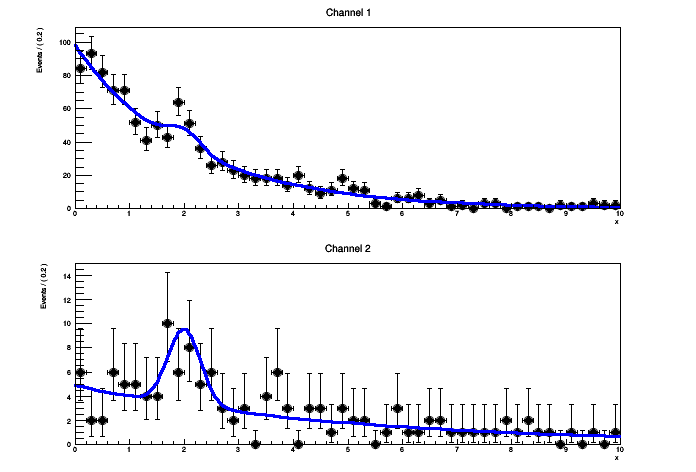

In [26]:
c.Divide(1,2)                                                                                                   
c.cd(1)                                                                                                         
plot1.Draw()                                                                                                    
c.cd(2)                                                                                                         
plot2.Draw()                                                                                                    
c.SaveAs("plots/Simultaneous_data.png")                                                                               
c.Draw()                                                                                                                
if(doFit):                                                                                                      
    res = pdf.fitTo(data, r.RooFit.Save(True), r.RooFit.Minimizer("Minuit2","Migrad"))                      
    res.Print()                                                                                                   
    c = r.TCanvas()                                                                                          
    plot1 = x.frame(r.RooFit.Title("Channel 1"))                                                             
    plot2 = x.frame(r.RooFit.Title("Channel 2"))                                                             
    data.plotOn(plot1,r.RooFit.Cut("index==index::channel1"))                                                
    data.plotOn(plot2,r.RooFit.Cut("index==index::channel2"))                                                
                                                                                                                
    pdf.plotOn(plot1,r.RooFit.ProjWData(data),r.RooFit.Slice(w.cat("index"),"channel1"))                  
    pdf.plotOn(plot2,r.RooFit.ProjWData(data),r.RooFit.Slice(w.cat("index"),"channel2"))     
    c.Divide(1,2)                                                                                               
    c.cd(1)                                                                                                     
    plot1.Draw()                                                                                                
    c.cd(2)                                                                                                     
    plot2.Draw()                                                                                                
    c.SaveAs("plots/SimultaneousFit.png")                                                                             
    c.Draw()
    
    mc = r.RooStats.ModelConfig("ModelConfig",w)                                                             
    mc.SetPdf(pdf)                                                                                              
    mc.SetParametersOfInterest(r.RooArgSet(w.var("mu")))                                                     
    mc.SetObservables(r.RooArgSet(w.var("x"),w.cat("index")))                                                
    w.defineSet("nuisParams","a1,nbkg1,a2,nbkg2")                                                               
    mc.SetNuisanceParameters(w.set("nuisParams"))                                                               
    mc.SetSnapshot(r.RooArgSet(w.var("mu")))                                                                 
    getattr(w,'import')(mc)                                                                                     
    w.writeToFile("plots/SimultaneousModel.root",True)                          